In [2]:
!pip install shapely
import cv2
import math
import os
import sys
import time
import numpy as np
import skimage.io
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.measure import label, regionprops
from matplotlib import pyplot as plt
from shapely.geometry import Polygon
from shapely.ops import split
import json

ROOT_DIR = os.getcwd()

You are using pip version 18.1, however version 20.3.4 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


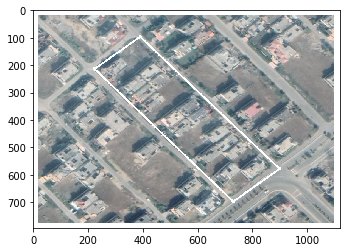

In [55]:
image = skimage.io.imread(os.path.join(ROOT_DIR, "block_1.png"))

max_y = image.shape[0]
    
points = [(224, max_y - 580), (729, max_y - 97), (898, max_y - 216), (390, max_y - 697), (224, max_y - 580)]

cv2.line(image,points[0],points[1],(0,255,0),5)
cv2.line(image,points[1],points[2],(0,255,0),5)
cv2.line(image,points[2],points[3],(0,255,0),5)
cv2.line(image,points[3],points[4],(0,255,0),5)
cv2.line(image,points[4],points[0],(0,255,0),5)
for p in points:
    cv2.circle(image, p, 1, (2, 255, 255), thickness=10)
    
plt.figure()
plt.gca().invert_yaxis()
plt.imshow(image)

[(224.0, 214.0), (729.0, 697.0), (898.0, 578.0), (390.0, 97.0), (224.0, 214.0)]
0.9378676447598766
149810.0513276294
140502.0
isRectangle


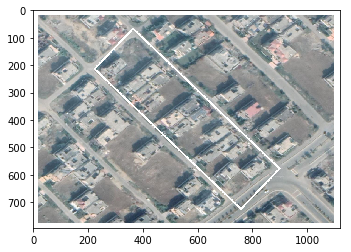

In [67]:
poly = Polygon(points)
image = skimage.io.imread(os.path.join(ROOT_DIR, "block_1.png"))

print(list(poly.exterior.coords))
print(poly.area / poly.minimum_rotated_rectangle.area)
print(poly.minimum_rotated_rectangle.area)
print(poly.area)

min_rect_points = [(364, 67), (898, 577), (757, 724), (224, 214), (364, 67)]
cv2.line(image,min_rect_points[0],min_rect_points[1],(255,255,0),5)
cv2.line(image,min_rect_points[1],min_rect_points[2],(255,255,0),5)
cv2.line(image,min_rect_points[2],min_rect_points[3],(255,255,0),5)
cv2.line(image,min_rect_points[3],min_rect_points[4],(255,255,0),5)
cv2.line(image,min_rect_points[4],min_rect_points[0],(255,255,0),5)

plt.figure()
plt.gca().invert_yaxis()
plt.imshow(image)

if(poly.area / poly.minimum_rotated_rectangle.area) > 0.9:
    print("isRectangle")

block_44.png
[[690  94]
 [691  94]
 [665  96]
 [693  92]
 [735 684]
 [428 702]
 [387 105]
 [690  94]]


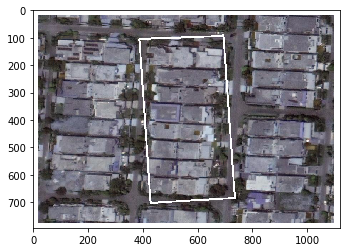

In [13]:
# Opening JSON file
f = open('dha-phase2-region/data.json')
 
# returns JSON object as
# a dictionary
data = json.load(f)


keys = []
for k in data: 
    keys.append(k)
    
for key in keys:
    points_arr = np.asarray(data[key], dtype=np.int32)
    print(key)
    
    plt.figure()
    plt.gca().invert_yaxis()
    
    print(points_arr)
    img_path = "dha-phase2-region/{}".format(key)
    image = cv2.imread(os.path.join(ROOT_DIR, img_path))
    
    isClosed = True
    
    
    image = cv2.polylines(image, [points_arr], isClosed, (255,255,255), 5)
    

    plt.imshow(image)
    
    break

f.close()